In [1]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.metrics import precision_score


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [5]:
# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [6]:
# use svmlight file for xgboost
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

In [7]:
# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
# set xgboost params
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 2  # the number of training iterations

In [9]:
#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)


[15:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
# extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 1.0


In [11]:
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [12]:
# dump the models
bst.dump_model('dump.raw.txt')


In [13]:
bst

In [14]:
from xgboost import plot_tree

<AxesSubplot:>

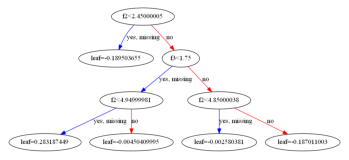

In [15]:
plot_tree(bst, num_trees=4)

In [16]:
bst.trees_to_dataframe()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,f2,2.45,0-1,0-2,0-1,5.732271e+01,53.333328
1,0,1,0-1,Leaf,NaN,NaN,NaN,NaN,4.260355e-01,17.777777
2,0,2,0-2,Leaf,NaN,NaN,NaN,NaN,-2.188450e-01,35.555553
3,1,0,1-0,f2,2.45,1-1,1-2,1-1,1.506911e+01,53.333328
4,1,1,1-1,Leaf,NaN,NaN,NaN,NaN,-2.130178e-01,17.777777
5,1,2,1-2,f3,1.75,1-3,1-4,1-3,3.101432e+01,35.555553
6,1,3,1-3,f2,4.95,1-5,1-6,1-5,4.329006e+00,19.999998
7,1,4,1-4,f2,4.85,1-7,1-8,1-7,6.019692e-01,15.555554
8,1,5,1-5,Leaf,NaN,NaN,NaN,NaN,4.090909e-01,17.333332
9,1,6,1-6,Leaf,NaN,NaN,NaN,NaN,-9.753488e-09,2.666667


In [17]:
dtest.get_label()

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.], dtype=float32)